<style>
body {
  background-color: lightblue;
}

h1 {
  color: white;
  text-align: center;
}

p {
  font-family: verdana;
  font-size: 20px;
}
<h1>Loan Defaulter Prediction</h1>

<h1><center>Loan Defaulter Prediction</center></h1>

<h3>We have dataset of shape (39717,111) where 39717 is total row and 111 are total features. Here we have to pre-processed data because there are many redundant for eg- many column have all nan value some column have all same data in all row. When our pre-processing finished our dataset reduce to (39717, 31). We have to analyze our pre-processing data first seperate label and features And divide whole dataset into two parts testing and for training. Here we have .33 percent of whole dataset as testing file and remaining as training part. Then we tried different model for training and we see that for these best is <bold>Logistic Regression</bold> .</h3>
<h3>Here our label consist of <bold> Charged off, Current , Fully Paid</bold>. We can consider Current and Fully Paid as Non Defaulter and Charged off as Defaulter</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('loan.xlsx')

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,0.120212,324.561922,6.896893e+04,13.315130,0.146512,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,0.037248,208.874874,6.379377e+04,6.678594,0.491812,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,0.092500,167.020000,4.040400e+04,8.170000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,0.118600,280.220000,5.900000e+04,13.400000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,0.145900,430.780000,8.230000e+04,18.600000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
detail = pd.read_excel('Data_Dictionary.xlsx')

In [6]:
import seaborn as sns

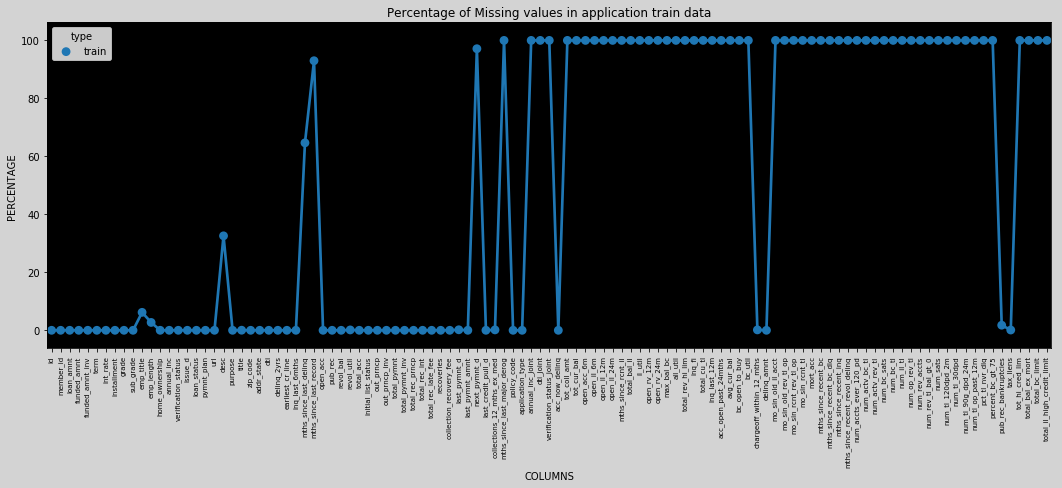

In [7]:
fig = plt.figure(figsize=(18,6))
miss_train = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
miss_train["type"] = "train"
missing = pd.concat([miss_train],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application train data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [8]:
data.isnull().sum(axis = 0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                12
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
sum(data.isnull().sum(axis = 0) == 0)

43

In [10]:
data.shape

(39717, 111)

In [11]:
df = data.dropna( axis = 1, how ='all')

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaT,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaT,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaT,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaT,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,2016-06-01,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,0.120212,324.561922,6.896893e+04,13.315130,0.146512,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,0.037248,208.874874,6.379377e+04,6.678594,0.491812,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,0.092500,167.020000,4.040400e+04,8.170000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,0.118600,280.220000,5.900000e+04,13.400000,0.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,0.145900,430.780000,8.230000e+04,18.600000,0.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Max of loan amount : 35000 Min of loan amount :500


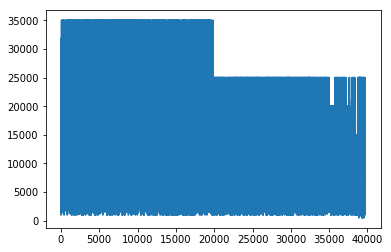

In [14]:
plt.plot(df['loan_amnt'])
print('Max of loan amount : {} Min of loan amount :{}'.format(max(df['loan_amnt']),min(df['loan_amnt'])))

Max of funded loan amount : 35000 Min of funded loan amount :500


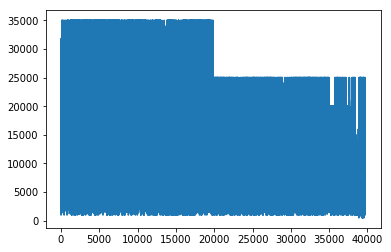

In [15]:
plt.plot(df['funded_amnt'])
print('Max of funded loan amount : {} Min of funded loan amount :{}'.format(max(df['funded_amnt']),min(df['funded_amnt'])))

In [16]:
sum(df['funded_amnt'] - df['loan_amnt'] != 0)          #number of funded amount that is difference from loan amount

1849

Max of funded amount inv : 35000.0 Min of funded amount inv :0.0


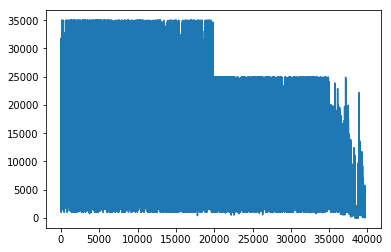

In [17]:
plt.plot(df['funded_amnt_inv'])
print('Max of funded amount inv : {} Min of funded amount inv :{}'.format(max(df['funded_amnt_inv']),min(df['funded_amnt_inv'])))

In [18]:
df.term.unique()

array([u' 36 months', u' 60 months'], dtype=object)

In [19]:
import warnings

In [20]:
df['term'] = df['term'].map({' 36 months' : 36, ' 60 months': 60})

/home/pallavi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Max of interest rate : 0.2459 Min of interest rate :0.0542


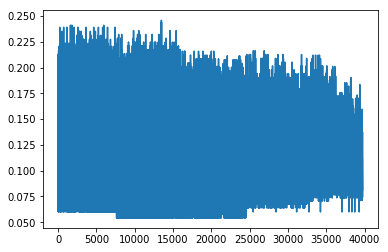

In [21]:
plt.plot(df['int_rate'])
print('Max of interest rate : {} Min of interest rate :{}'.format(max(df['int_rate']),min(df['int_rate'])))

Max of installment : 1305.19 Min of installment :15.69


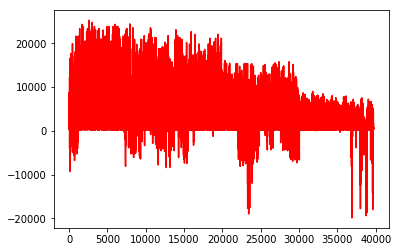

In [22]:
plt.plot(df['installment'] * df['term'] - df['loan_amnt'], 'r')
print('Max of installment : {} Min of installment :{}'.format(max(df['installment']),min(df['installment'])))

In [23]:
df.isnull().sum(axis = 0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            12
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [24]:
lis = [u'id', u'member_id', u'emp_title', u'desc', u'url', u'zip_code', u'mths_since_last_delinq', u'mths_since_last_record', u'next_pymnt_d', u'addr_state', u'title', u'pub_rec_bankruptcies', u'tax_liens', u'policy_code', u'chargeoff_within_12_mths', u'collections_12_mths_ex_med', u'last_credit_pull_d', u'last_pymnt_d', u'pymnt_plan', u'initial_list_status', u'application_type', u'acc_now_delinq', u'delinq_amnt', u'issue_d', u'earliest_cr_line']

In [25]:
data_new  = df[[i for i in df.columns if i not in lis]]


In [26]:
data_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,36,0.1065,162.87,B,B2,10+ years,RENT,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,60,0.1527,59.83,C,C4,< 1 year,RENT,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,36,0.1596,84.33,C,C5,10+ years,RENT,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,36,0.1349,339.31,C,C1,10+ years,RENT,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,60,0.1269,67.79,B,B5,1 year,RENT,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


In [27]:
data_new.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

In [28]:
lim = []
for i in data_new.columns:
    if len(data_new[i].unique()) < 5 :
        lim.append(i)

In [29]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
inq_last_6mths             39717 non-null int64
open_acc                   39717 non-null int64
pub_rec   

In [30]:
data_new['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11])

In [31]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
inq_last_6mths             39717 non-null int64
open_acc                   39717 non-null int64
pub_rec   

In [32]:
Y = data_new['loan_status']
data_new = data_new.drop(['loan_status'], axis = 1)

In [33]:
obj_dtypes = [i for i in data_new.select_dtypes(include=np.object).columns ]
num_dtypes = [i for i in data_new.select_dtypes(include = np.number).columns]

In [34]:
li_imp  = data_new.columns

In [35]:
obj_dtypes

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose']

In [36]:
num_dtypes

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt']

In [37]:
for i in li_imp :
    data_new[i]  = data_new[i].fillna(data_new[i].mode()[0])

In [38]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null int64
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
purpose                    39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
inq_last_6mths             39717 non-null int64
open_acc                   39717 non-null int64
pub_rec                    39717 non-null int64
revol_bal  

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in obj_dtypes:
    #print(le.fit_transform(data_new[i]))
    data_new[i] = le.fit_transform(data_new[i])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_new, Y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/pallavi/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pallavi/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
from sklearn.metrics import classification_report
def class_report(model,X_text,y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

In [44]:
class_report(clf,X_test, y_test)

              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00      1829
     Current       1.00      0.99      0.99       407
  Fully Paid       1.00      1.00      1.00     10871

   micro avg       1.00      1.00      1.00     13107
   macro avg       1.00      0.99      1.00     13107
weighted avg       1.00      1.00      1.00     13107



In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
class_report(rfc,X_test, y_test)

/home/pallavi/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

 Charged Off       1.00      0.97      0.98      1829
     Current       1.00      1.00      1.00       407
  Fully Paid       0.99      1.00      1.00     10871

   micro avg       1.00      1.00      1.00     13107
   macro avg       1.00      0.99      0.99     13107
weighted avg       1.00      1.00      1.00     13107



In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
class_report(dtc,X_test, y_test)

              precision    recall  f1-score   support

 Charged Off       0.99      0.98      0.98      1829
     Current       1.00      1.00      1.00       407
  Fully Paid       1.00      1.00      1.00     10871

   micro avg       1.00      1.00      1.00     13107
   macro avg       0.99      0.99      0.99     13107
weighted avg       1.00      1.00      1.00     13107



In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
class_report(gnb,X_test, y_test)

              precision    recall  f1-score   support

 Charged Off       0.97      0.74      0.84      1829
     Current       0.88      1.00      0.94       407
  Fully Paid       0.96      0.99      0.98     10871

   micro avg       0.96      0.96      0.96     13107
   macro avg       0.94      0.91      0.92     13107
weighted avg       0.96      0.96      0.96     13107



In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
class_report(gbc,X_test, y_test)

              precision    recall  f1-score   support

 Charged Off       1.00      0.97      0.99      1829
     Current       1.00      1.00      1.00       407
  Fully Paid       1.00      1.00      1.00     10871

   micro avg       1.00      1.00      1.00     13107
   macro avg       1.00      0.99      0.99     13107
weighted avg       1.00      1.00      1.00     13107

